In [ ]:
"""
binomial distribution

성공확률이  θ인 베르누이 시도를  N번 하는 경우를 생각해 보자. 
가장 운이 좋을 때에는  N번 모두 성공할 것이고 가장 운이 나쁜 경우에는 
한 번도 성공하지 못할 겻이다.  
N번 중 성공한 횟수를 확률 변수  X라고 한다면  
X의 값은 0 부터  N까지의 정수 중 하나가 될 것이다.

이러한 확률 변수를 
이항 분포(binomial distribution)를 따르는 확률 변수라고 한다.

n : 총 시도 횟수
p : 성공확률

E(X) : np
V(X) : np(1-p)

"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
"""
scipy를 사용한 베르누이 분포의 시뮬레이션

scipy의 stats 서브 패키지에 있는 binom 클래스는 이항 분포 클래스이다.
n 인수와 p 인수를 사용하여 모수를 설정한다.
"""

In [74]:
# 모수 설정
# 총 10번 시도, 성공 확률 0.6
n = 10
p = 0.6
rv = stats.binom(n=10, p=0.6)
rv

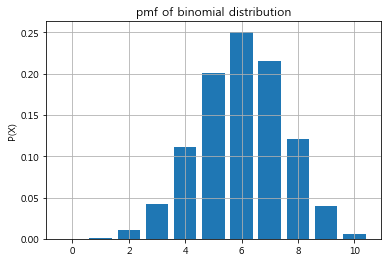

In [13]:
# pmf : 확률 질량 함수 (probability mass function)
x = np.arange(n+1)
plt.bar(x, rv.pmf(x))
plt.ylabel("P(X)")
plt.title("pmf of binomial distribution")
plt.grid()
plt.show()

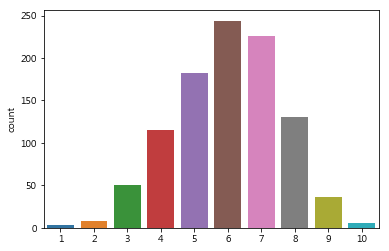

In [37]:
# simulation : 1000 trial
np.random.seed(0)
x = rv.rvs(1000)

# seaborn conterplot
sns.countplot(x)
plt.show()

In [59]:
y = np.bincount(x, minlength=n+1)/len(x)
xx = np.arange(n+1)
df = pd.DataFrame(
    {
        "theoretic": rv.pmf(xx),
        "simulation": y
    }
)
df = df.stack().reset_index()
df.columns = ["num of success", "type", "ratio"]
df.pivot_table("ratio", "num of success", "type")


type,simulation,theoretic
num of success,,
0,0.000,0.000105
1,0.003,0.001573
2,0.008,0.010617
3,0.050,0.042467
4,0.115,0.111477
5,0.182,0.200658
6,0.244,0.250823
7,0.226,0.214991
8,0.130,0.120932


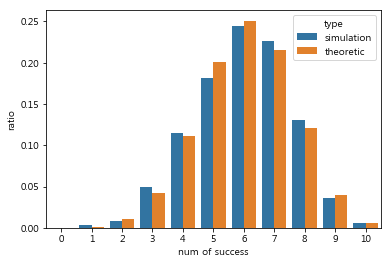

In [60]:
sns.barplot(x="num of success", y="ratio", hue="type", data=df)
plt.show()

In [75]:
np.random.seed(0)
x = rv.rvs(1000)

p = 0.6
print(10 * p)
print(10 * p * (1 - p))
print(x.mean())
print(x.var())

6.0
2.4000000000000004
6.009
2.460919


In [ ]:
"""
연습 문제 1

베르누이 확률 분포의 모수가 다음과 같을 경우에
 각각 샘플을 생성한 후 기댓값과 분산을 구하고 
 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다.

샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

θ=0.9 ,  N=10

"""

In [29]:
n = 5; p = 0.9
rv = stats.binom(n=n, p=p)
rv

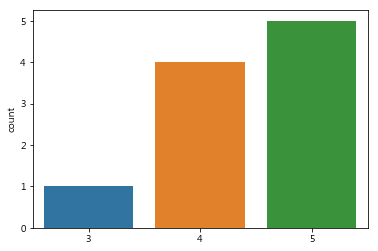

In [30]:
np.random.seed(0)
x = rv.rvs(10)
sns.countplot(x)
plt.show()


In [31]:
y = np.bincount(x, minlength=n+1)/len(x)
xx = np.arange(n+1)
df = pd.DataFrame(
    {
        "theory": rv.pmf(xx),
        "simulation": y
    }
)
df = df.stack().reset_index()
df.columns = ["num of success", "type", "ratio"]
df
df.pivot("num of success", "type", "ratio")

type,simulation,theory
num of success,,
0,0.0,0.00001
1,0.0,0.00045
2,0.0,0.00810
3,0.1,0.07290
4,0.4,0.32805
5,0.5,0.59049


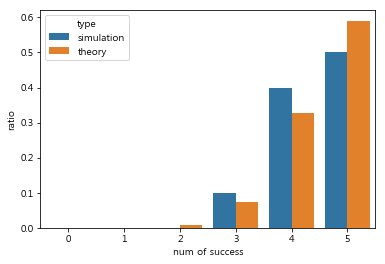

In [32]:
sns.barplot(x="num of success", y="ratio", hue="type", data=df)
plt.show()

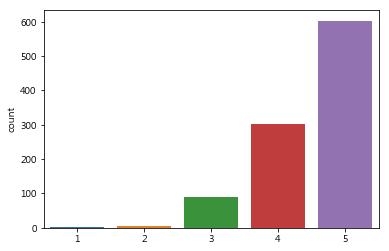

In [33]:
n = 5
p = 0.9
rv = stats.binom(n=n, p=p)
np.random.seed(0)
x = rv.rvs(1000)
sns.countplot(x)
plt.show()

In [45]:
np.random.seed(0)
xx = np.arange(n+1)
y = np.bincount(x, minlength=n+1)/len(x)

df = pd.DataFrame(
    {
        "theory": rv.pmf(xx),
        "simulation": y
    }
)
df = df.stack().reset_index()
df.columns = ["num of success", "type", "ratio"]
df
df.pivot_table("ratio", "num of success", "type")

type,simulation,theory
num of success,,
0,0.000,0.00001
1,0.001,0.00045
2,0.006,0.00810
3,0.089,0.07290
4,0.301,0.32805
5,0.603,0.59049


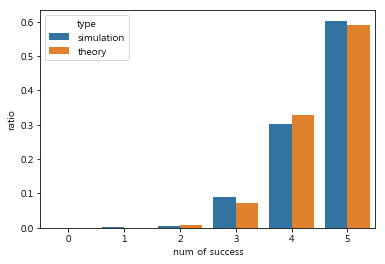

In [46]:
sns.barplot(x="num of success", y="ratio", hue="type", data=df)
plt.show()

In [52]:
print(n * p)
print( n * p * (1-p))
print(x.mean())
print(x.var())
s = pd.Series(x)
s.describe()

4.5
0.4499999999999999
4.499
0.475999


count    1000.000000
mean        4.499000
std         0.690272
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
dtype: float64